### Compare US State energy production and consumption

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read data
df = pd.read_csv('../data/StateEnergyRankings.csv')

df.head()

,State,"Total Energy Production, Trillion Btu","Production, Rank","Consumption per Capita, Million Btu","Consumption per Capita, Rank","Expenditures per Capita, Dollars","Expenditures per Capita, Rank"
0,WY,5884,3,874,3,6703,1
1,TX,23329,1,461,6,3703,10
2,AK,1349,13,874,2,6429,2
3,PA,9492,2,263,30,2890,36
4,ND,4275,7,804,4,6223,3


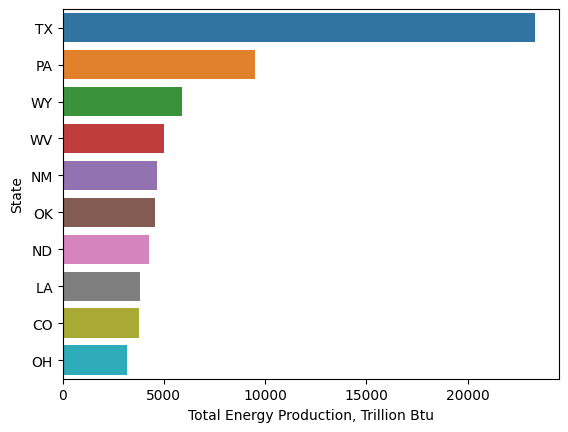

In [5]:
#Graph bar chart for top 10 production
productionRanking = df.sort_values(by=['Production, Rank'])
histProductionRanking = sns.barplot(data=productionRanking[:10], y='State', x='Total Energy Production, Trillion Btu')

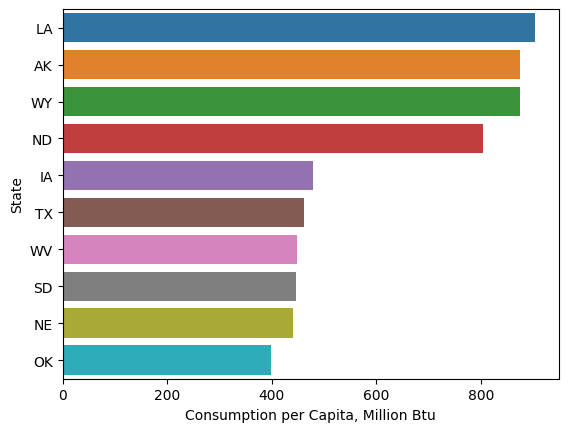

In [6]:
#Graph bar chart for top 10 consumption
consumptionRanking = df.sort_values(by=['Consumption per Capita, Rank'])
histConsumptionRanking = sns.barplot(data=consumptionRanking[:10], y='State', x='Consumption per Capita, Million Btu')

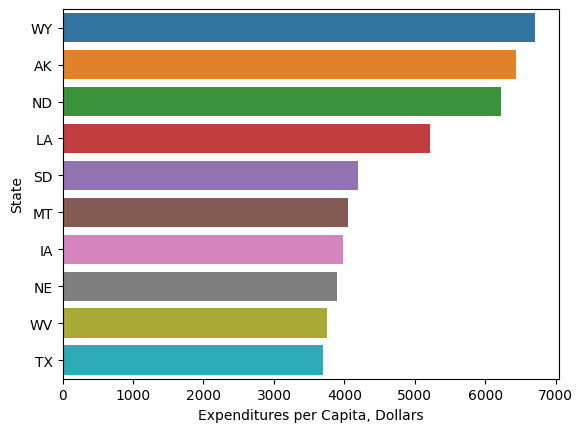

In [7]:
#Graph bar chart for top 10 expenditure
expenditureRanking = df.sort_values(by=['Expenditures per Capita, Rank'])
histExpenditureRanking = sns.barplot(data=expenditureRanking[:10], y='State', x='Expenditures per Capita, Dollars')

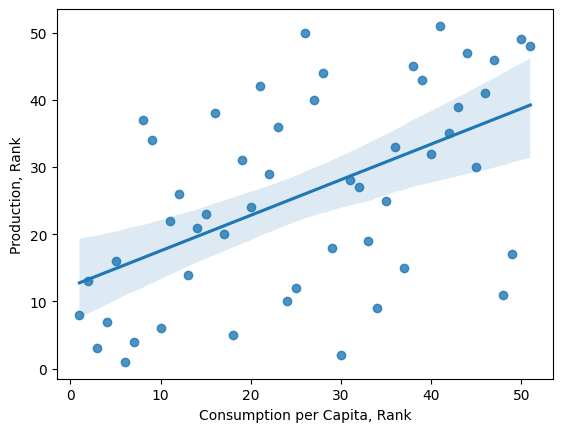

In [8]:
#Graph scatterplot of US states in production vs consumption ranking
figProductionVsConsumption = sns.regplot(data=df, x='Consumption per Capita, Rank', y='Production, Rank')